<a href="https://colab.research.google.com/github/letsgo247/cs231n/blob/master/Spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

ix: range(0, 100)
ix: range(100, 200)
ix: range(200, 300)


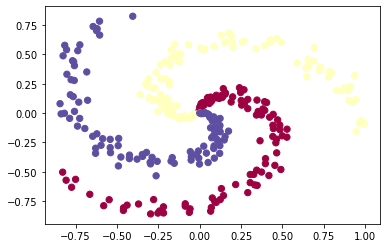

In [9]:
N = 100
D = 2
K = 3
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j, N*(j+1))
  print('ix:',ix)
  r = np.linspace(0, 1, N)
  # print('r:',r)
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
  # print('t:',t)
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  # print(X)
  y[ix] = j

plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Training a Softmax Classifier

In [32]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]

for i in range(200):
  scores = np.dot(X,W) + b

  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss

  if i % 10 ==0:
    print("iteration %d: loss %f" % (i, loss))

  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  dW += reg*W

  W -= step_size * dW
  b -= step_size * db

iteration 0: loss 1.099770
iteration 10: loss 0.906267
iteration 20: loss 0.833832
iteration 30: loss 0.800431
iteration 40: loss 0.782725
iteration 50: loss 0.772438
iteration 60: loss 0.766075
iteration 70: loss 0.761955
iteration 80: loss 0.759198
iteration 90: loss 0.757303
iteration 100: loss 0.755976
iteration 110: loss 0.755030
iteration 120: loss 0.754347
iteration 130: loss 0.753849
iteration 140: loss 0.753483
iteration 150: loss 0.753211
iteration 160: loss 0.753009
iteration 170: loss 0.752857
iteration 180: loss 0.752743
iteration 190: loss 0.752657


In [29]:
scores = np.dot(X,W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


#Neural Network

In [33]:
h = 100
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]

for i in range(10000):
  hidden_layer = np.maximum(0, np.dot(X,W) + b)
  scores = np.dot(hidden_layer,W2) + b2

  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss

  if i % 1000 ==0:
    print("iteration %d: loss %f" % (i, loss))

  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  dhidden = np.dot(dscores, W2.T)
  dhidden[hidden_layer <= 0] = 0
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  dW2 += reg*W2
  dW += reg*W

  W -= step_size * dW
  b -= step_size * db
  W2 -= step_size * dW2
  b2 -= step_size * db2

iteration 0: loss 1.098522
iteration 1000: loss 0.316854
iteration 2000: loss 0.264526
iteration 3000: loss 0.250428
iteration 4000: loss 0.244971
iteration 5000: loss 0.242527
iteration 6000: loss 0.241387
iteration 7000: loss 0.240940
iteration 8000: loss 0.240737
iteration 9000: loss 0.240621


In [34]:
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99
